# Base perceptron implementation

Perceptron implementation that solves binary classififcation task. Train/test on IRIS dataset

In [95]:
import numpy as np

class Perceptron:
    """
    A simple perceptron classifier.

    The perceptron is a binary classification algorithm that learns a linear decision boundary.
    It adjusts its weights and bias based on the errors it makes during training.

    Parameters:
    -----------
    eta : float, optional (default=0.01)
        The learning rate, a constant used to control the step size during weight updates.
    n_iter : int, optional (default=50)
        The number of iterations (epochs) over the training dataset.
    random_state : int, optional (default=1)
        A seed value for the random number generator to ensure reproducibility.

    Attributes:
    -----------
    __w : ndarray
        The weight vector after fitting the model.
    __b : float
        The bias term after fitting the model.
    __errors : list
        A list containing the number of misclassifications in each epoch.
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.__eta = eta
        self.__n_iter = n_iter
        self.__random_state = random_state
        self.__w = None
        self.__b = None
        self.__errors = None

    def fit(self, X: np.array, y: np.array):
        """
        Fit the perceptron model to the training data.

        Parameters:
        -----------
        X : ndarray, shape (n_samples, n_features)
            The training input samples, where `n_samples` is the number of samples and
            `n_features` is the number of features.
        y : ndarray, shape (n_samples,)
            The target values (class labels) as a 1D array of binary values (0 or 1).

        Returns:
        --------
        self : Perceptron
            The fitted perceptron instance.
        """
        rgen = np.random.RandomState(self.__random_state)
        self.__w = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])  # Initialize weights randomly (noraml distribution)
        self.__b = np.float_(0.)  # Initialize bias to 0
        self.__errors = []  # List to store misclassifications per epoch

        for _ in range(self.__n_iter):
            errors = 0
            for x_i, target in zip(X, y):
                # Calculate the update for weights and bias
                update = self.__eta * (target - self.predict(x_i))
                self.__w += update * x_i  # Update weights
                self.__b += update  # Update bias
                errors += int(update != 0)  # Count misclassifications
            self.__errors.append(errors)  # Store errors for this epoch

        return self

    def __net_input(self, X: np.array) -> float:
        """
        Calculate the net input (weighted sum of inputs plus bias).

        Parameters:
        -----------
        X : ndarray, shape (n_features,)
            The input sample for which to calculate the net input.

        Returns:
        --------
        float
            The net input, calculated as the dot product of the input and weights plus the bias.
        """
        return np.dot(X, self.__w) + self.__b

    def predict(self, X: np.array) -> float:
        """
        Predict the class label for a given input sample.

        Parameters:
        -----------
        X : ndarray, shape (n_features,)
            The input sample for which to predict the class label.

        Returns:
        --------
        float
            The predicted class label (0 or 1).
        """
        return np.where(self.__net_input(X) >= 0.0, 1.0, 0.0)
    
    @property
    def errors(self):
        return self.__errors

import pandas as pd

In [96]:
import pandas as pd
df = pd.read_csv("./data/iris_data.csv", header=None)
df

,0,1,2,3,4
0,0.0,1.0,2.0,3.0,4
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


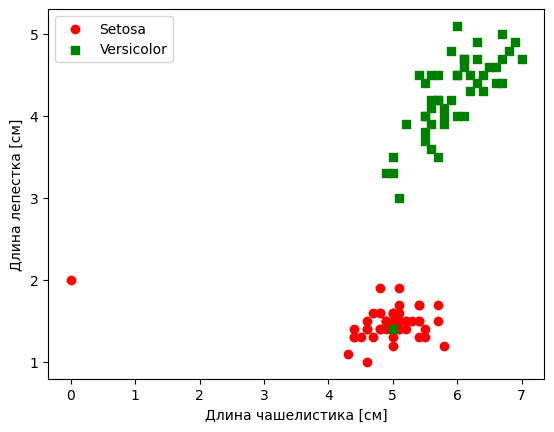

In [101]:
import matplotlib.pyplot as plt

y = df.iloc[0: 100, 4].values
y = np.where(y == "Iris-setosa", 0, 1)
X = df.iloc[0: 100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="green", marker="s", label="Versicolor")
plt.xlabel("Длина чашелистика [см]")
plt.ylabel("Длина лепестка [см]")
plt.legend(loc="upper left")
plt.show()

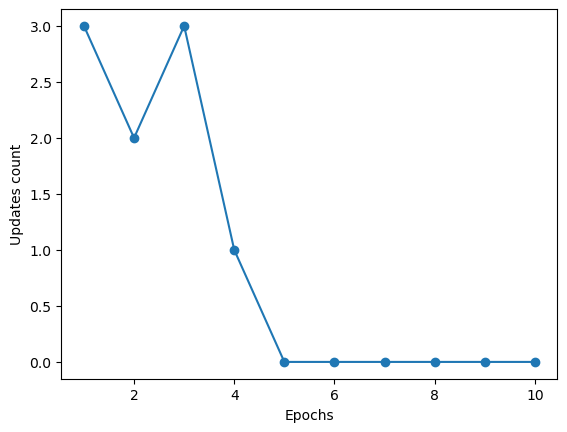

In [102]:
perceptron = Perceptron(eta=0.1, n_iter=10)
perceptron.fit(X=X, y=y)
plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Updates count")
plt.show()


Персептрон сошёлся после 6-й эпохи

In [113]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resuliton=0.02):
    markers = ("o", "s", "^", "v", "<")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0] .min() - 1, X[:, 0] .max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resuliton), np.arange(x2_min, x2_max, resuliton))
    array = np.array([xx1.ravel(), xx2.ravel()]).T
    lab = classifier.predict(array)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=f"Class {cl}",
            edgecolor="black"
            )

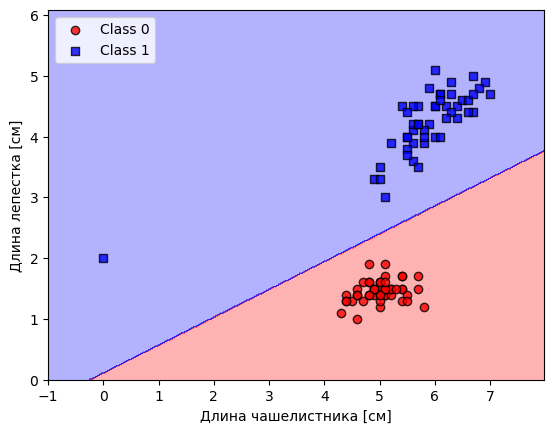

In [114]:
plot_decision_regions(X, y, classifier=perceptron)
plt.xlabel("Длина чашелистника [см]")
plt.ylabel("Длина лепестка [см]")
plt.legend(loc="upper left")
plt.show()